In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [2]:
dataset = pd.read_csv("creditcard.csv")

In [3]:
print("Any nulls in the dataset:", dataset.isnull().values.any())
print('-------')
print("No. of unique labels:", len(dataset['Class'].unique()))
print("Label values:", dataset.Class.unique())
# 0 is for normal credit card transaction
# 1 is for fraudulent credit card transaction
print('-------')
print("Break down of Normal and Fraud Transactions")
print(pd.value_counts(dataset['Class'], sort=True))

Any nulls in the dataset: True
-------
No. of unique labels: 3
Label values: [ 0.  1. nan]
-------
Break down of Normal and Fraud Transactions
Class
0.0    1983
1.0       2
Name: count, dtype: int64


C:\Users\mudra\AppData\Local\Temp\ipykernel_1592\3460932789.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'], sort=True))


C:\Users\mudra\AppData\Local\Temp\ipykernel_1592\459402839.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort=True)


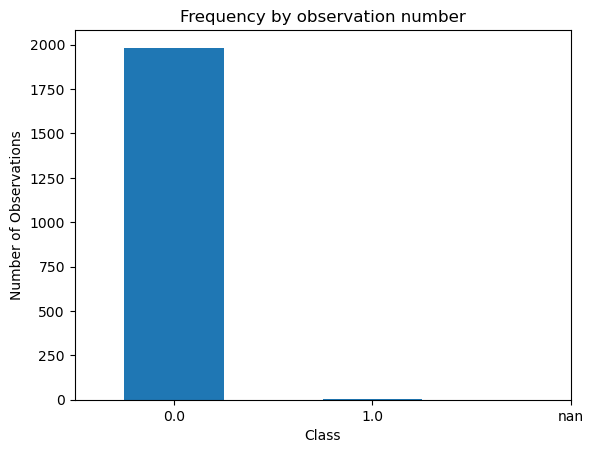

In [4]:
count_classes = pd.value_counts(dataset['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.show()

C:\Users\mudra\AppData\Local\Temp\ipykernel_38740\3903573167.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(dataset['Class'], sort = True)


Text(0, 0.5, 'Number of Observations')

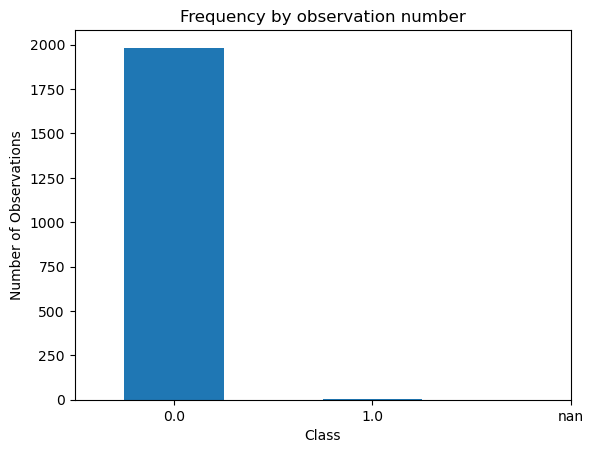

In [8]:
count_class = pd.value_counts(dataset['Class'], sort = True)
count_class.plot(kind='bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())), dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [5]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]


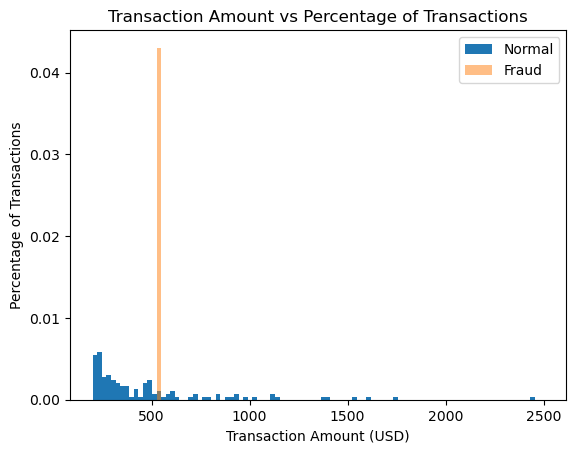

In [6]:
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction Amount vs Percentage of Transactions")
plt.xlabel("Transaction Amount (USD)")
plt.ylabel("Percentage of Transactions")
plt.show()

In [7]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [8]:
raw_data = dataset.values
# The last element contains if the transaction is normal which is represented by 0 and if fraud then 1
labels = raw_data[:, -1]
# The other data points are the electrocardiogram data
data = raw_data[:, 0:-1]

# Splitting the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=2021)

In [9]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [10]:
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [11]:
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]

In [12]:
print("No. of records in Fraud Train Data =", len(fraud_train_data))
print("No. of records in Normal Train Data =", len(normal_train_data))
print("No. of records in Fraud Test Data =", len(fraud_test_data))
print("No. of records in Normal Test Data =", len(normal_test_data))


No. of records in Fraud Train Data = 3
No. of records in Normal Train Data = 1585
No. of records in Fraud Test Data = 0
No. of records in Normal Test Data = 398


In [13]:
input_dim = normal_train_data.shape[1]  # num of columns, 30
encoding_dim = 14
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = 4

In [14]:
input_layer = tf.keras.layers.Input(shape=(input_dim,))

# Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(1e-7))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim1, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
history = autoencoder.fit(normal_train_data, normal_train_data, epochs=5,
                          batch_size=64, shuffle=True,
                          validation_data=(test_data, test_data),
                          verbose=1).history

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan


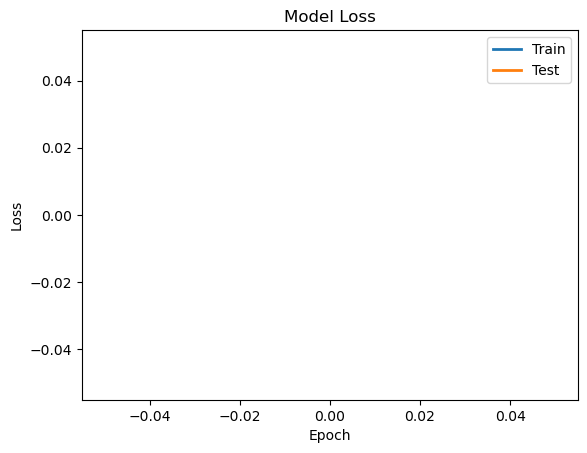

In [17]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim(ymin=0.70, ymax=1)  # Uncomment if you want to set y-axis limits
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


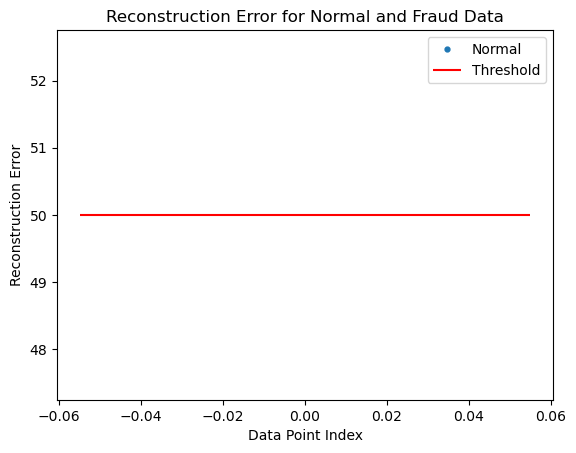

In [18]:
# Predict reconstruction errors using the autoencoder
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)

# Create a DataFrame for reconstruction error and true class labels
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_labels})

# Set a fixed threshold for classification
threshold_fixed = 50

# Group by true class labels
groups = error_df.groupby('True_class')

# Create a plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")

# Draw the threshold line
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Threshold")

# Add legends and labels
ax.legend()
plt.title("Reconstruction Error for Normal and Fraud Data")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()


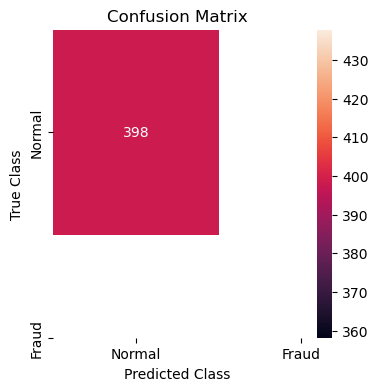

Accuracy: 1.0
Recall: 0.0
Precision: 0.0


C:\Users\mudra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mudra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Define labels for the classes
LABELS = ['Normal', 'Fraud']  # Adjust based on your classes

# Create a confusion matrix
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Print Accuracy, Precision, and Recall
print("Accuracy:", accuracy_score(error_df['True_class'], error_df['pred']))
print("Recall:", recall_score(error_df['True_class'], error_df['pred']))
print("Precision:", precision_score(error_df['True_class'], error_df['pred']))
